<a href="https://colab.research.google.com/github/martasaparicio/lematecX/blob/main/2.3-Data_Exploration_Cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cookbook

## Data exploration

Data exploration is used in machine learning to help us understand the data and problem at hand so that we can model it. As such, data exploration is an important step in the application of machine learning algorithms.

In this cookbook, we'll look at a set of common data exploration techniques. Most of the illustrated techniques use the [seaborn](http://seaborn.pydata.org/) library.

## Preamble

To visualize data, you have to... have data. To do this, let's create an artificial dataset that can be used in the various problems in this cookbook.

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [ ]:
# Create Data
df = pd.DataFrame()

df['x'] = np.linspace(0,500,18)
df['y'] = random.sample(range(1000, 5000), 18)
df['z'] = [1,0,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1]
df['k'] = ['a','b','c','d','e',
           'f','g','h','i','j',
           'k','l','m','n','o','p',
           'q','r']
df['q'] = df['y'] * random.random()*2

df

,x,y,z,k,q
0,0.000000,4436,1,a,1324.127483
1,29.411765,2807,0,b,837.877783
2,58.823529,1394,0,c,416.103181
3,88.235294,1416,1,d,422.670089
4,117.647059,4202,1,e,1254.279460
5,147.058824,1808,1,f,539.680453
6,176.470588,4468,1,g,1333.679349
7,205.882353,1525,0,h,455.206134
8,235.294118,1842,1,i,549.829311
9,264.705882,1668,1,j,497.891037


## Problem 1

Plot a line graph that relates the variable `x` to the variable `y`.

### Solution

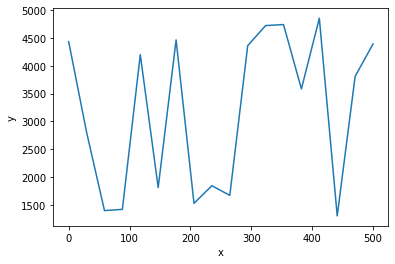

In [ ]:
# Create line graph
sns.lineplot(x='x', y='y', data=df)

## Problem 2

Plot a bar graph that has the variable `k` on the x-axis and the variable `y` on the y-axis.

### Solution

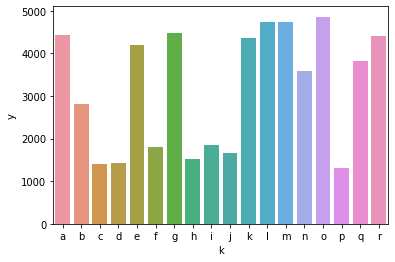

In [ ]:
# Plot bar graph
sns.barplot(x='k', y='y', data=df)

## Problem 3

Plot the histogram of variable `q`.

### Solution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


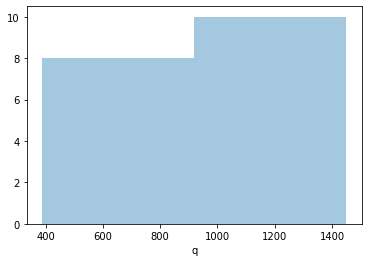

In [ ]:
# Plot histogram
sns.distplot(df['q'], kde=False)

## Problem 4

Draw a boxplot of the `y` variable.

### Solution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


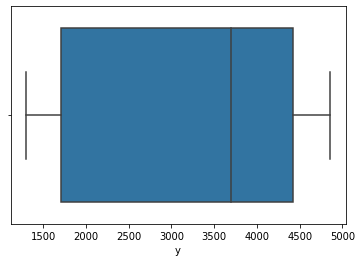

In [ ]:
# Draw boxplot
sns.boxplot(df['y'])

## Problem 5

Plot a scatter plot that relates the variable `x` and the variable `y`.

### Solution

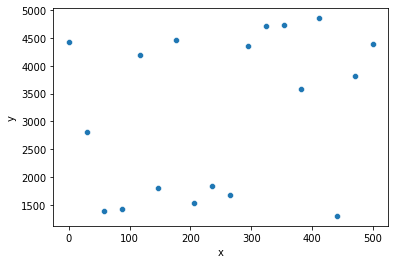

In [ ]:
# Plot scatter plot
sns.scatterplot(x='x', y='y', data=df)

## Problem 6

Plot a set of scatter plots that relate all variables to each other.

### Solution

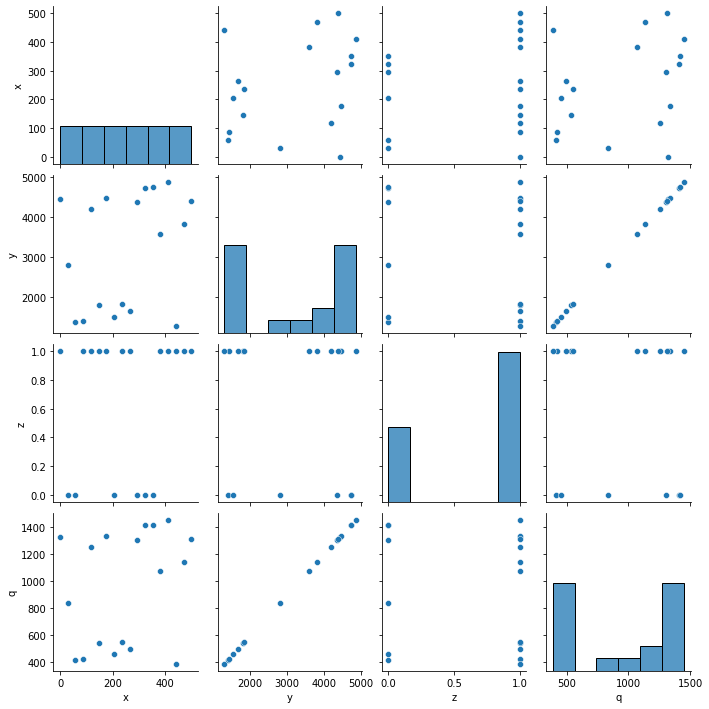

In [ ]:
# Plot a set of scatter plots
sns.pairplot(df)

## Problem 7

Draw a heat map of correlations.

### Solution

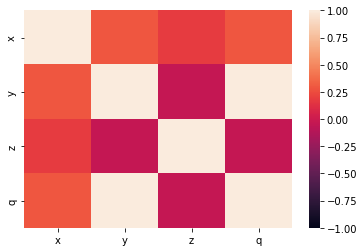

In [ ]:
# Solution with the Seaborn library
sns.heatmap(df.corr(), vmin=-1, vmax=1)

## Problem 8

Detect errors and anomalies.

### Solution

In [ ]:
# Import new data
url = 'https://raw.githubusercontent.com/pmarcelino/datasets/master/prog-book.csv'
df = pd.read_csv(url)

# Summarize the statistical dataset
df.describe()

,Rating,Reviews,Number_Of_Pages,Price
count,271.000000,271.000000,271.000000,2.710000e+02
mean,4.067417,184.376384,475.077491,4.105491e+04
std,0.290749,552.519159,306.147492,6.749490e+05
min,3.000000,-160.000000,50.000000,9.323529e+00
25%,3.915000,5.000000,289.000000,3.101618e+01
50%,4.100000,34.000000,384.000000,4.631765e+01
75%,4.250000,116.000000,572.500000,6.859559e+01
max,5.000000,5938.000000,3168.000000,1.111112e+07


### Comments

The dataset presented above has information regarding programming books for sale on a generic website. The data indicates the score, number of revisions, the number of pages of the book and its price.

As we can see, there are two values that do not make sense:

* **'Reviews'**. It has -160 as a minimum value, which doesn't make sense because we can't have a negative number of reviews.
* **'Price'**. It has a max price of 1.111112e+07 dollars - which is approximately 11 million dollars - as a max value. It's hard to believe that a programming book, for sale on a generic website, could be so expensive.

## Problem 9

Fix errors and anomalies. 

### Solution

In [ ]:
df.drop(df[df['Reviews']==-160].index, inplace=True)
df.drop(df[df['Price']==df['Price'].max()].index, inplace=True)

### Comments

To resolve the detected errors, just delete the observations in question. In the case of 'Reviews', the number was easy to write so we put the number directly. However, for 'Price' the number was more difficult to write, which led us to use the `max()` method. In general, it is recommended to use `min()` and `max()` because these ensure that we are not mistaken in defining the observation to be deleted.

Since we are only seeing extreme values (minimum and maximum), in practice it would be necessary to recheck the statistical summary of the dataset to ensure that there are no more obvious errors or anomalies.